In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

1. 파일 구성  
- ratings.txt : 전체 리뷰를 모아둔 데이터, 전체 20만 개의 데이터로 구성됨  
- ratings_train.txt : 학습 데이터, 총 15만 개의 데이터로 구성  
- ratings_test.txt : 평가 데이터, 총 5만 개의 데이터로 구성

In [3]:
DATA_IN_PATH = './data-in/'
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file :
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')


파일 크기 : 
ratings.txt                   19.52MB
ratings_test.txt              4.89MB
ratings_train.txt             14.63MB


In [4]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt',
                        delimiter='\t', quoting=3) #구분이 \t quoting은 
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [5]:
print(len(train_data))

150000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [7]:
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

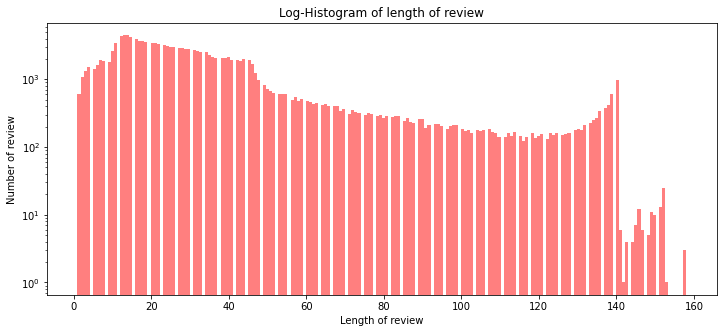

In [8]:
plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=200, alpha=0.5, color= 'r')
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review') #10의 지수형태로 변경
plt.show()

- 짧은 길이부터 140자까지 고르게 분포되어 있음  
- 20자 이하에 많이 분포되어 있다가 길이가 길어질 수록 점점 적어지다가 140자 부근에서 갑자기 많아짐  
- 140자 제한(한글 기준)이 있는 데이터이기 때문

In [9]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 158
리뷰 길이 최소 값: 1
리뷰 길이 평균 값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간 값: 27.0
리뷰 길이 제 1 사분위: 16.0
리뷰 길이 제 3 사분위: 42.0


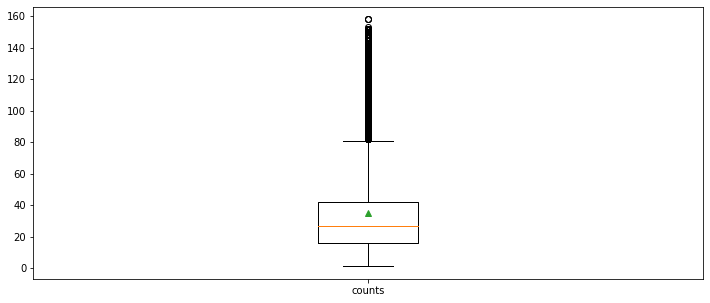

In [10]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)
plt.show()

- 길이가 긴 데이터가 꽤 존재함  
- 중간값과 평균값은 아래쪽에 위치  
- 워드클라우드를 이용해 자주 사용된 어휘 알아보기  
- 사전 작업으로, 데이터 안에 들어 있는 문자열이 아닌 데이터는 모두 제거함

In [11]:
train_review = [review for review in train_data['document'] if type(review) is str]

<function matplotlib.pyplot.show(close=None, block=None)>

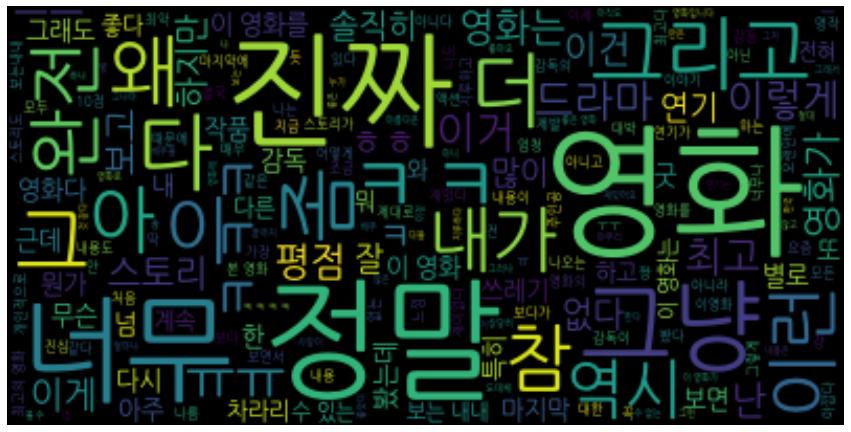

In [19]:
wordcloud = WordCloud(font_path=DATA_IN_PATH + 'NanumGothic.otf').generate(' '.join(train_review))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

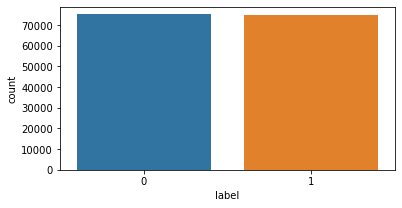

In [16]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(x=train_data['label'])
plt.show()

In [17]:
print("긍정 리뷰 개수: {}".format(train_data['label'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


In [22]:
def get_length(s):
    return len(s.split(' ')) #빈칸기준으로 split한 배열이 나오고 그것을 len

train_word_counts = train_data['document'].astype(str).apply(get_length)

In [23]:
print(train_word_counts[:5])

0     5
1     4
2     1
3     6
4    11
Name: document, dtype: int64


In [25]:
train_word_conts = train_data['document'].astype(str).apply(lambda x: len(x.split(' '))) #한번 쓰고 버릴 거면 람다식이 편함

In [26]:
print(train_word_counts[:5])

0     5
1     4
2     1
3     6
4    11
Name: document, dtype: int64


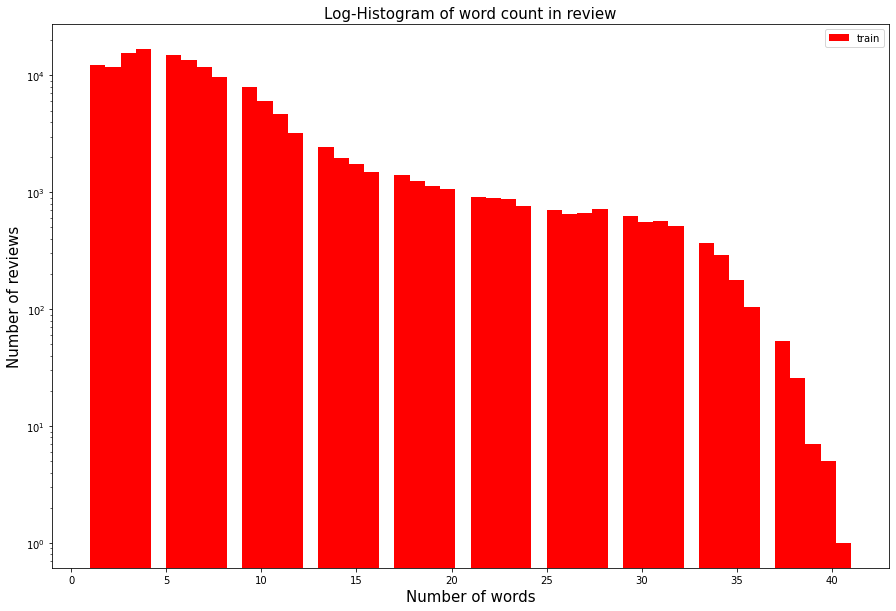

In [27]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonpositive='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)
plt.show()

In [28]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 41
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 7.58
리뷰 단어 개수 표준편차: 6.51
리뷰 단어 개수 중간 값: 6.0
리뷰 단어 개수 제 1 사분위: 3.0
리뷰 단어 개수 제 3 사분위: 9.0


- 평균 7 ~ 8 개 정도의 단어 수를 가지고 있고, 중간값의 경우 6개 정도의 단어를 가지고 있음  
- 글자 수 제한때문에 영어 데이터에 비해 길이가 짧음  
- 이 경우 모델에 적용할 최대 단어수를 6개가 아닌 7개로 설정해도 큰 무리가 없음  
- 각 데이터에 대해 특수문자 유무를 확인  
- 리뷰에 자주 사용되는 특별한 특수문자는 없으므로 일반적인 마침표와 물음표만 확인

In [29]:
#특수문자 유무 확인 
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x)) # 마침표
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

물음표가있는 질문: 8.25%
마침표가 있는 질문: 51.76%


In [35]:
#데이터 전처리
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [33]:
print(train_data.head())

         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1


In [39]:
review_text = re.sub("[^가-힇 ㄱ-ㅎ ㅏ-ㅣ \\s]", "", train_data['document'][0])
print(review_text)

아 더빙 진짜 짜증나네요 목소리


In [40]:
okt = Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [41]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])

In [42]:
clean_review = [token for token in review_text if not token in stop_words]
print(clean_review)

['더빙', '진짜', '짜증나다', '목소리']


In [43]:
def preprocessing(review, okt, remove_stopwords=False, stop_words=[]):
    review_text = re.sub("[^가-힇 ㄱ-ㅎ ㅏ-ㅣ \\s]", "", review) #아닌것은 제거 ㄱ-ㅎ
    word_review = okt.morphs(review_text, stem=True)
    if remove_stopwords:
        word_review = [token for token in word_review if not token in stop_words]
    return word_review

In [44]:
clean_train_review = []
 
for review in train_data['document']:
    if type(review) == str: 
        clean_train_review.append(preprocessing(review, okt, remove_stopwords=True,
                                               stop_words=stop_words))
    else:
        clean_train_review.append([])

In [46]:
print(clean_train_review[:4])

[['더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'], ['교도소', '이야기', '구먼', '솔직', '재미', '없다', '평점', '조정']]


In [49]:
#테스트 데이터 불러오기

test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt',
                        delimiter='\t', quoting=3) #구분이 \t quoting은 
clean_test_review = []
for review in test_data['document']:
    if type(review) == str: 
        clean_test_review.append(preprocessing(review, okt, remove_stopwords=True,
                                               stop_words=stop_words))
    else:
        clean_test_review.append([])
print(clean_test_review[:4])

[['굳다', 'ㅋ'], [], ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'], ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]


In [50]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)

In [52]:
print(tokenizer.word_index)

{'영화': 1, '보다': 2, '하다': 3, '에': 4, '을': 5, '도': 6, '를': 7, '없다': 8, '이다': 9, '있다': 10, '좋다': 11, '너무': 12, '다': 13, '정말': 14, '재밌다': 15, '되다': 16, '적': 17, '만': 18, '같다': 19, '진짜': 20, '으로': 21, '로': 22, '아니다': 23, '않다': 24, '점': 25, '에서': 26, '만들다': 27, '과': 28, '나오다': 29, '연기': 30, '평점': 31, '최고': 32, '내': 33, '그': 34, '나': 35, '안': 36, '인': 37, '스토리': 38, '생각': 39, '못': 40, '왜': 41, '드라마': 42, '게': 43, '감동': 44, '사람': 45, '보고': 46, '이렇다': 47, '말': 48, '아깝다': 49, '고': 50, '더': 51, 'ㅋㅋ': 52, '배우': 53, '때': 54, '와': 55, '재미있다': 56, '요': 57, '감독': 58, '거': 59, '그냥': 60, '들다': 61, '재미': 62, '시간': 63, '내용': 64, '뭐': 65, '까지': 66, '중': 67, '주다': 68, '재미없다': 69, '자다': 70, '좀': 71, '쓰레기': 72, '하고': 73, '지루하다': 74, '네': 75, '가다': 76, '모르다': 77, '그렇다': 78, '싶다': 79, '지': 80, '작품': 81, '사랑': 82, '알다': 83, '하나': 84, '다시': 85, '볼': 86, '오다': 87, '마지막': 88, '잘': 89, '완전': 90, '저': 91, '이건': 92, '정도': 93, 'ㅋ': 94, 'ㅠㅠ': 95, '많다': 96, 'ㅋㅋㅋ': 97, '처음': 98, '장면': 99, '액션': 100, '주인공': 101, '걸': 102, 

In [53]:
train_sequences = tokenizer.texts_to_sequences(clean_train_review)

In [54]:
print(train_sequences[:5])

[[463, 20, 265, 662], [915, 464, 46, 604, 1, 219, 1455, 30, 964, 676, 24], [391, 2455, 24996, 2320, 5669, 2, 225, 13], [6493, 110, 8114, 242, 62, 8, 31, 3603], [1019, 19408, 34, 9138, 30, 830, 1, 2587, 26, 1108, 244, 3, 14247, 19409, 1076, 259, 244]]


In [57]:
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

In [58]:
word_vocab = tokenizer.word_index

In [59]:
print(word_vocab['더빙'])

463


In [62]:
# max_sequence_length = 8 고정길이를 만들어주는게 pad_sequences
MAX_SEQUENCE_LENGTH = 8
train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post' )
print(train_inputs[:5])

[[  463    20   265   662     0     0     0     0]
 [  604     1   219  1455    30   964   676    24]
 [  391  2455 24996  2320  5669     2   225    13]
 [ 6493   110  8114   242    62     8    31  3603]
 [ 1108   244     3 14247 19409  1076   259   244]]


In [63]:
train_labels = np.array(train_data['label'])

In [64]:
test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post' )
test_labels = np.array(test_data['label'])

In [65]:
DATA_IN_PATH ='data-in/'
TRAIN_INPUT_DATA ='nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA ='nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIG = 'nsmc_data_configs.json'

data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [67]:
import os
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIG, 'w'), ensure_ascii=False)